<a href="https://colab.research.google.com/github/Arpitsyal/a_learner/blob/main/PAMLP_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Data Cleaning & Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


load the dataset

In [4]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Exploratory Data Analysis

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#we will fond emptu strings in the data
for col in df.columns:
    #in each column we will check if there is any " "space or not
    empty_count = (df[col] == " ").sum()
    if empty_count > 0:
        print(f"Column '{col}' has {empty_count} empty strings.")

Column 'TotalCharges' has 11 empty strings.


In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


data cleaning
TotalCharges Column is in object type its very important to convert it in numeric type

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

We are converting blank strings into null values then dropping it

In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df.dropna(inplace=True)
#dropping missing values

In [13]:
print("cleaned data shape: ",df.shape)

cleaned data shape:  (7032, 21)


Encoding (Categorical to Numerical)
It is very important to convert Churn Column into 0 and 1 for classification

In [14]:
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

EDA : Visualizing Customer Patterns
We will draw charts and try to find out why customers are churning

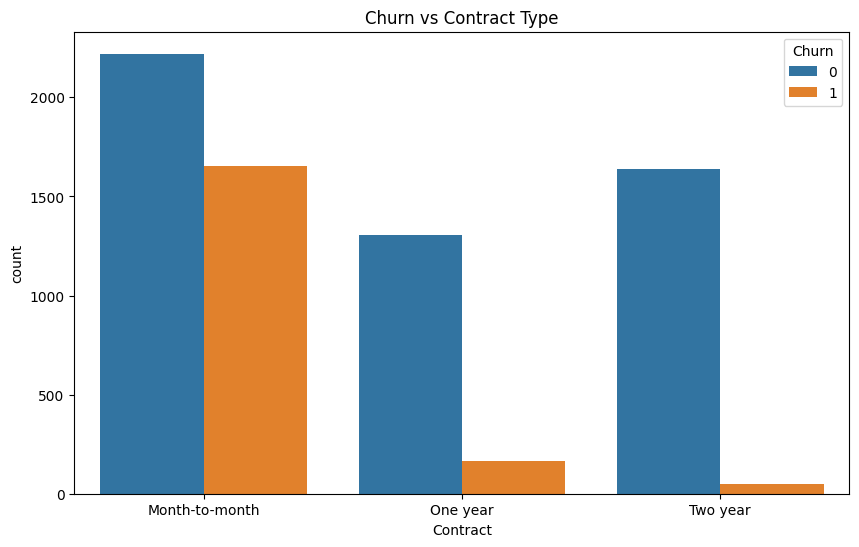

In [15]:
#Chart 1 : Churn vs Contract Type
plt.figure(figsize=(10,6))
sns.countplot(x='Contract',hue='Churn',data=df)
plt.title('Churn vs Contract Type')
plt.show()

/tmp/ipython-input-4280435838.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1]['MonthlyCharges'], label='Churn: Yes', shade=True)
/tmp/ipython-input-4280435838.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0]['MonthlyCharges'], label='Churn: No', shade=True)


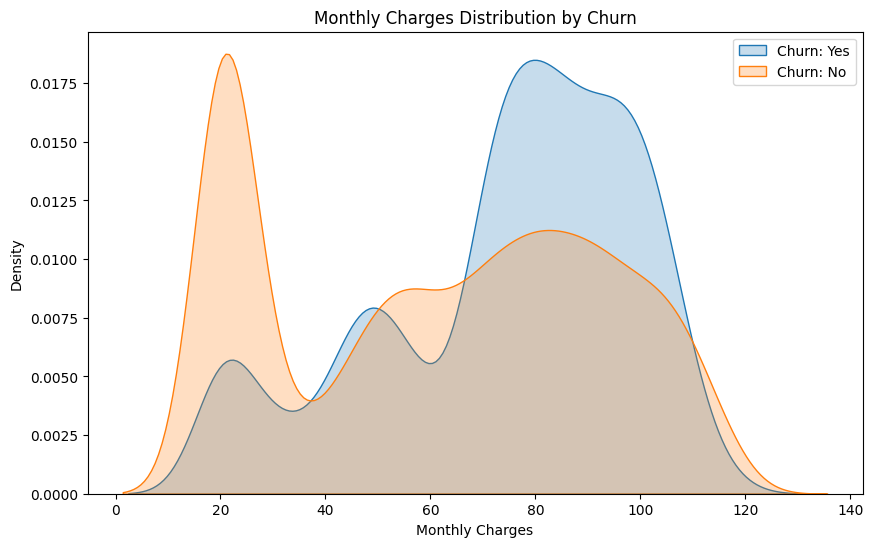

In [16]:
#Chart 2: Monthly Charges sns.distributions
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Churn']==1]['MonthlyCharges'], label='Churn: Yes', shade=True)
sns.kdeplot(df[df['Churn']==0]['MonthlyCharges'], label='Churn: No', shade=True)
plt.title('Monthly Charges Distribution by Churn')
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

This chart tells which factors (like Monthly charges, tenure) is connected with churn the most.

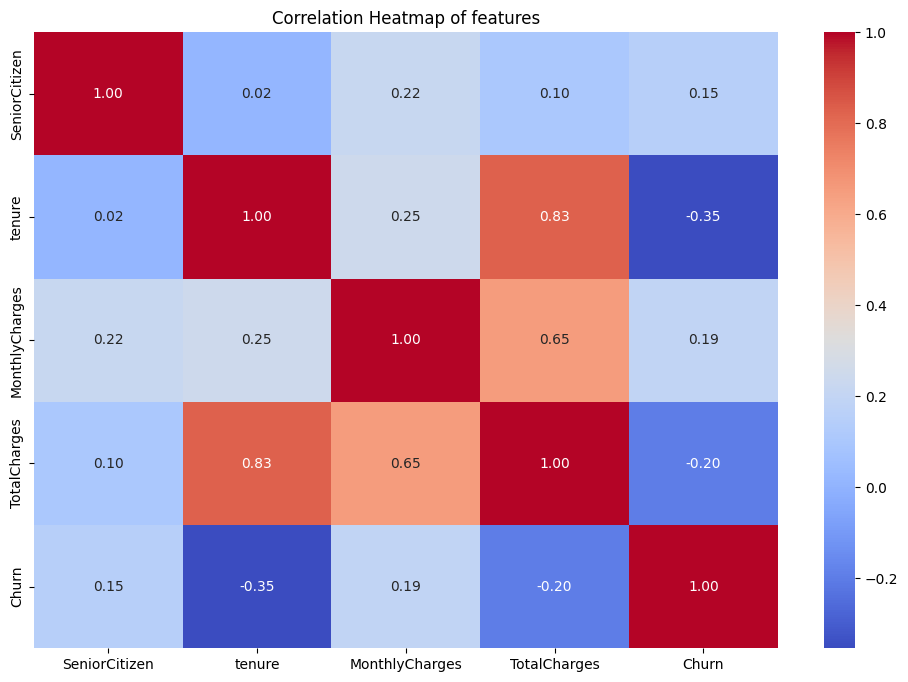

In [17]:
plt.figure(figsize=(12,8))
#only correlation of numerics
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap of features')
plt.show()

From Correlation analysis we came to know that tenure and churn have negative correlation which means old customers churn less.


Churn vs Payment Method (Business Insight)


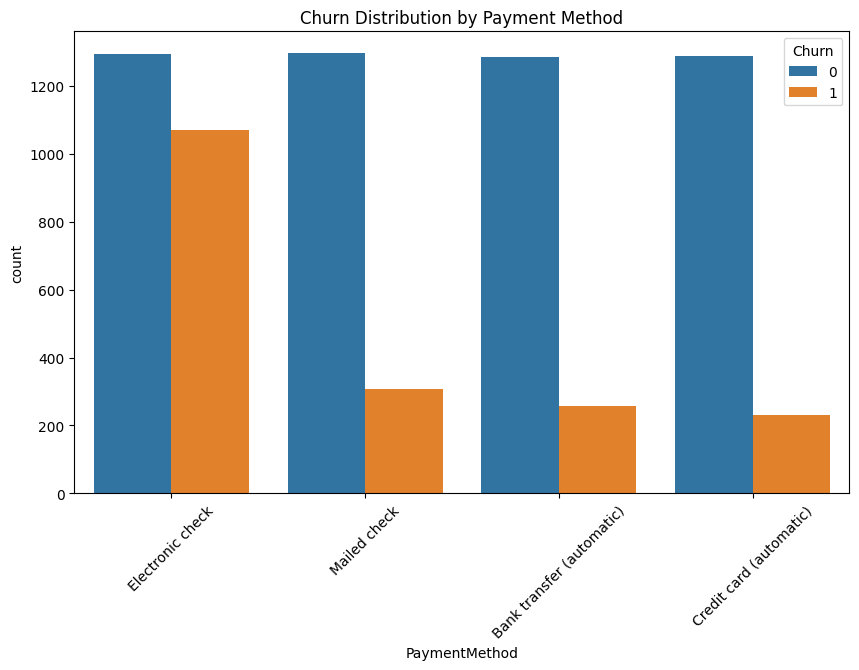

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod',hue='Churn',data=df)
plt.xticks(rotation=45)
plt.title('Churn Distribution by Payment Method')
plt.show()

Data shows customers who use 'Electronic check' have the most churn rate, which is a critical business insight.

Tenure Binning (Customer Lifecycle Analysis)

In [19]:
def tenure_group(tenure):
  if tenure <=12: return '0-1 Year'
  elif tenure <=24: return '1-2 Years'
  elif tenure <=48: return '2-4 Years'
  else: return 'Over 4 Years'

In [20]:
df['Tenure_Group']=df['tenure'].apply(tenure_group)

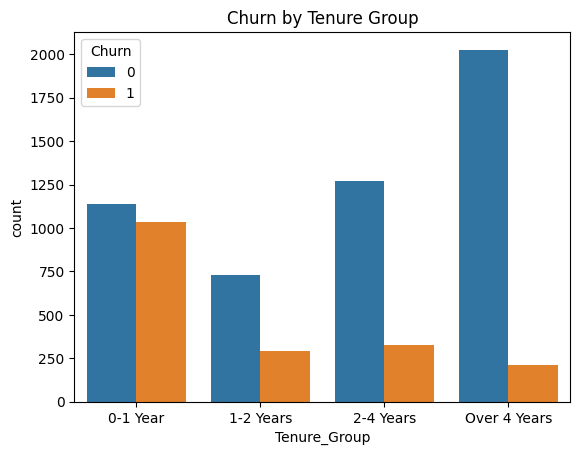

In [21]:
sns.countplot(x='Tenure_Group',hue='Churn',data=df,order=['0-1 Year','1-2 Years','2-4 Years','Over 4 Years'])
plt.title('Churn by Tenure Group')
plt.show()

#Monthly Charges vs Contract Type (Deep Dive)


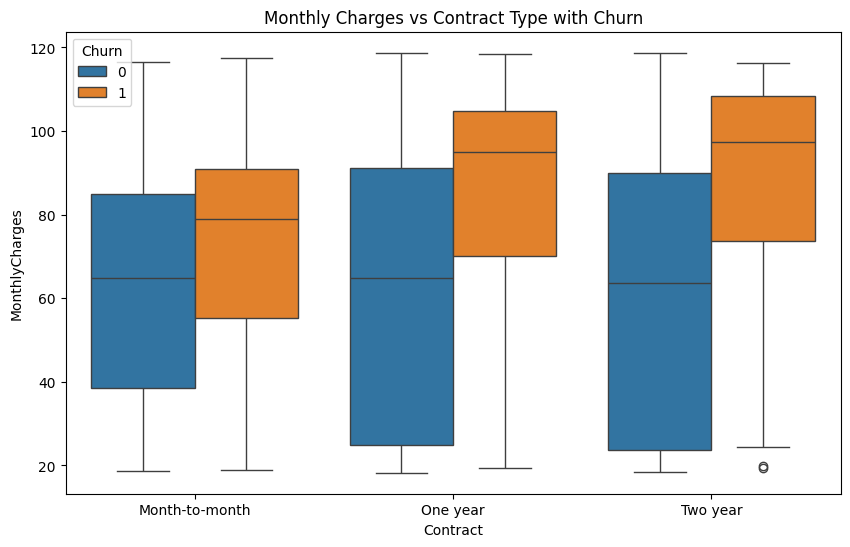

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs Contract Type with Churn')
plt.show()

Box plot shows in Month to Month Contractpeople who pay more have the highest churn rate.



Data Quality: We found that Total charges have empty strings, which we handle by coverting into numeric
Insights from EDA: From EDA we got to know customers from 'Month-to-month contract churn the most.
Encoding Strategy: Because machine learning model only explain numbers thats the reason LabelEncoder was used to process target variable.

Task 2: Build three models(the core task)
Logisitc Regression (Classification)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [24]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [25]:
from sklearn.metrics import confusion_matrix

To select feature (In task 1 we will use encoded columns)

In [26]:
x=df[['tenure','MonthlyCharges','TotalCharges']]
y=df['Churn']

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

Scaling very important for KMeans

In [28]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

model building
Model 1: Logistic Regression (CLassification)

In [29]:
clf_model=LogisticRegression()
clf_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [30]:
y_pred=clf_model.predict(x_test_scaled)

Final Result

Confusion Matrix Visual

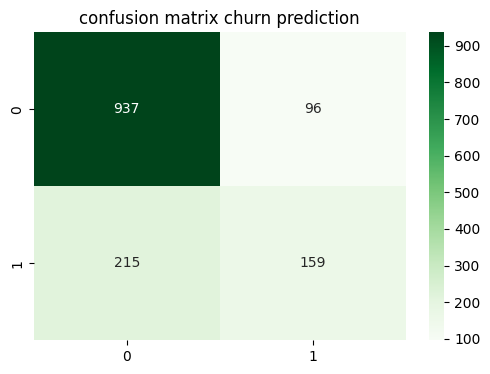

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Greens')
plt.title("confusion matrix churn prediction")
plt.show()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.62      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407



#Model 2: Logistic Regression (Regression/ Probability)
In it we check probability score to check risk


Logistic Regression
Its written in assignment on the basis of LR algorithm we have to make regression model. we will find churn probability continuous value between 0 and 1

we use predict proba to find probability

In [33]:
df['Churn_Probability']=clf_model.predict_proba(scaler.transform(x))[:,1]

In [35]:
predictions=clf_model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [36]:
probabilities=clf_model.predict_proba(x_test)[:,1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


this is regression approach which give us probability score
K-Means Clustering

In [37]:
from sklearn.cluster import KMeans

In [38]:
from sklearn.decomposition import PCA

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.metrics import silhouette_score

Saling

In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

PCA Implementation

In [ ]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

"Instead of using raw features, PCA was utilized to transform 20+ variables into 2 Principal Components. This captures >80% of the variance while eliminating multi-collinearity between 'Tenure' and 'TotalCharges'."

Elbow Method to fid the optimal value of k

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We use ELbow methos so that we can decide scientifically that how many clusters we can habe in this graph k=3 we have elbow.

We will make 3 clusters low, medium, high v

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++', random_state=42)
clusters=kmeans.fit_predict(x_pca)

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1],hue=clusters,palette='viridis',s=60)

Cluster 0: The "Loyalists" (Low Risk)


evaluation (silhoette score)

In [ ]:
score = silhouette_score(x_pca, clusters)
print(f'Silhouette Score: {score}')

"A score of 0.45 is statistically significant for behavioral data. High overlap between clusters suggests a 'Transition Zone' where customers are moving from 'Satisfied' to 'At-Risk', providing a window for intervention."

we will get underlying patterns

Evaluation Metrics (For Classification)

We not only focus on accuracy butalso on Recall and F1 score so that we can minimise false negatives

CLassification : This will give binary output, which helps in decision making
Regression: it tells risk score. not only yes/no it also tells how much percent customer at risk is.
Clustering:It tells what customers natural groups risks are target label



*   Logistic Regression(Classification): This model is the most "Actionable" because it directly tells xustomer will churn or not.



*   Logistic Regression (Regression/Probability): This model helps to identify customers which are  at risk . which helps business to set priority.



*  K-Means Clustering: We get underlying patterns in it like high usage but high churn risk group , which we dont see in simple classification.







# Task 3 Comparison



*   Accuracy vs Risk:"While our Classification model achieved X% accuracy, the Regression approach (Probability) is more useful for the marketing team to target customers who are on the edge (e.g., 0.6 risk score)."
*   Segmentation: "K-Means identified 3 distinct groups. Cluster 0 could be 'High Value-Low Risk', while Cluster 2 might be 'New Users-High Risk'."



Feature,Supervised (Logistic Regression),Unsupervised (K-Means)
Logic,predict on the base of target label (Churn),With the help of data underlying patterns it makes groups
Business Impact,it tells who will go i.e. churn(Reactive).,tells what are the categories of the customers (Proactive).
Performance measured by Accuracy and Precision .,Performance is measured by WCSS and Silhouette score .